In [1]:
import pandas as pd
import numpy as np

In [141]:
train_file_path=r"C:\Users\mritu\PycharmProjects\Projects\flight_fare_prediction\housing\artifact\data_ingestion\2022-08-19-15-47-07\ingested_data\train\new_train2.csv"


In [142]:

df=pd.read_csv(train_file_path)
df.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price
0,Multiple carriers,Delhi,Cochin,1.0,27.0,5.0,8.0,30.0,19.0,15.0,10.0,45.0,9149.0
1,Jet Airways,Delhi,Cochin,1.0,9.0,5.0,11.0,30.0,12.0,35.0,25.0,5.0,12373.0
2,SpiceJet,Delhi,Cochin,1.0,24.0,4.0,15.0,45.0,22.0,5.0,6.0,20.0,5583.0
3,Multiple carriers,Delhi,Cochin,1.0,21.0,3.0,12.0,50.0,1.0,35.0,12.0,45.0,7695.0
4,Air India,Delhi,Cochin,2.0,24.0,6.0,17.0,15.0,19.0,15.0,26.0,0.0,11972.0


In [4]:
df.shape

(8545, 13)

In [5]:
x,y=df.drop("Price",axis=1),df['Price']

In [6]:
x.shape

(8545, 12)

In [7]:
y.shape

(8545,)

In [8]:
x.isna().sum()

Airline           0
Source            0
Destination       0
Total_Stops       0
Journey_day       0
Journey_month     0
Dep_hour          0
Dep_min           0
Arrival_hour      0
Arrival_min       0
Duration_hours    0
Duration_mins     0
dtype: int64

In [9]:
# To fill NA values we use Simple Imputer

In [10]:
from sklearn.impute import SimpleImputer
# It is being used for numerical columns to fill NA values as specified

In [11]:
numerical_column=x.drop(columns=["Airline","Source","Destination"],axis=1)
numerical_column

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,1.0,27.0,5.0,8.0,30.0,19.0,15.0,10.0,45.0
1,1.0,9.0,5.0,11.0,30.0,12.0,35.0,25.0,5.0
2,1.0,24.0,4.0,15.0,45.0,22.0,5.0,6.0,20.0
3,1.0,21.0,3.0,12.0,50.0,1.0,35.0,12.0,45.0
4,2.0,24.0,6.0,17.0,15.0,19.0,15.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...
8540,1.0,27.0,3.0,9.0,0.0,4.0,25.0,19.0,25.0
8541,1.0,9.0,5.0,14.0,5.0,20.0,45.0,6.0,40.0
8542,1.0,15.0,5.0,12.0,50.0,1.0,30.0,12.0,40.0
8543,0.0,3.0,3.0,0.0,40.0,3.0,25.0,2.0,45.0


In [12]:
simple_imputer=SimpleImputer(strategy="median")

In [13]:
simple_imputer.fit_transform(numerical_column)


array([[ 1., 27.,  5., ..., 15., 10., 45.],
       [ 1.,  9.,  5., ..., 35., 25.,  5.],
       [ 1., 24.,  4., ...,  5.,  6., 20.],
       ...,
       [ 1., 15.,  5., ..., 30., 12., 40.],
       [ 0.,  3.,  3., ..., 25.,  2., 45.],
       [ 1.,  1.,  6., ..., 25., 15., 25.]])

In [15]:
df=simple_imputer.transform(numerical_column)

In [16]:
df

array([[ 1., 27.,  5., ..., 15., 10., 45.],
       [ 1.,  9.,  5., ..., 35., 25.,  5.],
       [ 1., 24.,  4., ...,  5.,  6., 20.],
       ...,
       [ 1., 15.,  5., ..., 30., 12., 40.],
       [ 0.,  3.,  3., ..., 25.,  2., 45.],
       [ 1.,  1.,  6., ..., 25., 15., 25.]])

In [17]:
simple_imputer.feature_names_in_

array(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'], dtype=object)

In [19]:
simple_imputer.statistics_ # values replaced when null values are there in a column

array([ 1., 12.,  5., 11., 25., 14., 25.,  8., 30.])

In [23]:
x.Journey_day.median()

12.0

In [29]:
# Now populating categgorical column
categorical_column=x.iloc[:,0:3]

In [30]:
categorical_column

,Airline,Source,Destination
0,Multiple carriers,Delhi,Cochin
1,Jet Airways,Delhi,Cochin
2,SpiceJet,Delhi,Cochin
3,Multiple carriers,Delhi,Cochin
4,Air India,Delhi,Cochin
...,...,...,...
8540,Jet Airways,Delhi,Cochin
8541,Jet Airways,Kolkata,Banglore
8542,Multiple carriers,Delhi,Cochin
8543,IndiGo,Banglore,New Delhi


In [32]:
# fit learns something form the data given

# fit_transform ..does change

In [33]:
SimpleImputer(strategy="most_frequent") # for categorical column

SimpleImputer(strategy='most_frequent')

In [35]:
# Creating customr transformer.. every trandformer must have atleast 2 functions..fit and transform
# If we dont want to use fit_tranform

In [174]:
class FeatureGenerato():
    

    def __init__(self,strategy="median") -> None:
        self.strategy=strategy
        

    def fit(self,X:pd.DataFrame):
        self.features=X.columns
        self.statistics=[]
        for column in X.columns:
            self.statistics.append(X[column].median())

    def transform(self,X:pd.DataFrame):
        for column in range(len(X.columns)):
            X[X.columns[column]].fillna(self.statistics[column])
        return X

    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)



In [64]:
# If we dont want to use fit_tranform

In [175]:

from sklearn.base import BaseEstimator, TransformerMixin



In [176]:
class FeatureGenerator(BaseEstimator,TransformerMixin):
    

    def __init__(self,strategy="median"):
        self.strategy=strategy
        

    def fit(self,X):
        self.features=X.columns
        self.statistics=[]
        for column in X.columns:
            self.statistics.append(X[column].median())
        return self
    def transform(self,X:pd.DataFrame):
        for idx,column in enumerate(X.columns):
            X[column].fillna(self.statistics[idx])
        return X




In [177]:
response=Test().fit(numerical_column)

In [178]:
response.statistics

[1.0, 12.0, 5.0, 11.0, 25.0, 14.0, 25.0, 8.0, 30.0]

In [179]:
for idx,column in enumerate(x.columns):
    print(idx,column)


0 Airline
1 Source
2 Destination
3 Total_Stops
4 Journey_day
5 Journey_month
6 Dep_hour
7 Dep_min
8 Arrival_hour
9 Arrival_min
10 Duration_hours
11 Duration_mins


In [208]:
num_column_name=["Total_Stops",	"Journey_day",	"Journey_month","Dep_hour",	"Dep_min","Arrival_hour","Arrival_min",	"Duration_hours","Duration_mins"]

In [209]:
cat_column_name=["Airline","Source","Destination"]

In [210]:
COLUMN_DURATION_HOURS="Duration_hours"
COLUMN_DURATION_MINUTES="Duration_mins"

In [211]:

class FeatureGenerator(BaseEstimator, TransformerMixin):

    def __init__(self, duration=True,
                 Duration_hours_idx=7,
                 Duration_mins_idx=8,columns=None):
        """
        FeatureGenerator Initialization
        
        """
        try:
            self.columns = columns
            if self.columns is not None:
                Duration_hours_idx=self.columns.index(COLUMN_DURATION_HOURS)
                Duration_mins_idx=self.columns.index(COLUMN_DURATION_MINUTES)
                # Duration_mins
                # total_rooms_ix = self.columns.index(COLUMN_TOTAL_ROOMS)
                # population_ix = self.columns.index(COLUMN_POPULATION)
                # households_ix = self.columns.index(COLUMN_HOUSEHOLDS)
                # total_bedrooms_ix = self.columns.index(COLUMN_TOTAL_BEDROOM)

            self.duration = duration
            self.Duration_hours_idx = Duration_hours_idx
            self.Duration_mins_idx = Duration_mins_idx
            # self.households_ix = households_ix
            # self.total_bedrooms_ix = total_bedrooms_ix
        except Exception as e:
            raise e

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            # room_per_household = X[:, self.total_rooms_ix] / \
            #                      X[:, self.households_ix]
            # population_per_household = X[:, self.population_ix] / \
            #                            X[:, self.households_ix]
            if self.duration:
                duration = X[:, self.Duration_hours_idx] + (X[:, self.Duration_mins_idx]/60)
                                   
                generated_feature = np.c_[X, duration]
            else:
                generated_feature = np.c_[X]

            return generated_feature
        except Exception as e:
            raise e






In [212]:
# Making the pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder


In [213]:
len(num_column_name)

9

In [214]:
num_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="median")),
    ('feature_generator',FeatureGenerator()),
    ('scaling',StandardScaler())
])

In [215]:
cat_pipeline=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ('oneHotEncoder',OneHotEncoder()),
    ('scaling',StandardScaler(with_mean=False))
])

In [216]:
preprocessing=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_column_name),
    ('cat_pipeline',cat_pipeline,cat_column_name)]
)

In [217]:
ans=preprocessing.fit_transform(df)

In [232]:
ans

array([[ 0.25829846,  1.57978425,  0.25506567, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25829846, -0.54301849,  0.25506567, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25829846,  1.22598379, -0.60403412, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.25829846,  0.16458242,  0.25506567, ...,  0.        ,
         0.        ,  0.        ],
       [-1.22301721, -1.2506194 , -1.46313392, ...,  0.        ,
         0.        ,  3.51716204],
       [ 0.25829846, -1.48648637,  1.11416547, ...,  0.        ,
         0.        ,  0.        ]])

In [165]:
df.dtypes

Airline            object
Source             object
Destination        object
Total_Stops       float64
Journey_day       float64
Journey_month     float64
Dep_hour          float64
Dep_min           float64
Arrival_hour      float64
Arrival_min       float64
Duration_hours    float64
Duration_mins     float64
Price             float64
dtype: object

In [220]:
test_file_path=r"C:\Users\mritu\PycharmProjects\Projects\flight_fare_prediction\housing\artifact\data_ingestion\2022-08-19-15-47-07\ingested_data\test\new_train2.csv"

In [221]:
df2=pd.read_csv(test_file_path)

In [222]:
df2

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Price
0,Multiple carriers,Delhi,Cochin,2.0,21.0,5.0,15.0,5.0,1.0,30.0,10.0,25.0,16655.0
1,GoAir,Delhi,Cochin,1.0,3.0,6.0,10.0,35.0,19.0,35.0,9.0,0.0,4959.0
2,Vistara,Kolkata,Banglore,1.0,9.0,5.0,20.0,20.0,9.0,5.0,12.0,45.0,9187.0
3,IndiGo,Chennai,Kolkata,0.0,24.0,5.0,14.0,45.0,17.0,5.0,2.0,20.0,3858.0
4,Jet Airways,Delhi,Cochin,1.0,21.0,5.0,22.0,50.0,4.0,25.0,5.0,35.0,12898.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,Multiple carriers,Delhi,Cochin,1.0,27.0,6.0,8.0,0.0,21.0,0.0,13.0,0.0,7408.0
2133,SpiceJet,Kolkata,Banglore,0.0,6.0,3.0,17.0,15.0,19.0,45.0,2.0,30.0,4622.0
2134,Air Asia,Delhi,Cochin,1.0,21.0,4.0,7.0,55.0,22.0,25.0,14.0,30.0,7452.0
2135,Jet Airways,Kolkata,Banglore,1.0,24.0,3.0,6.0,30.0,23.0,25.0,16.0,55.0,8824.0


In [223]:
ans2=preprocessing.transform(df2)

In [224]:
ans2

array([[ 1.73961414,  0.87218334,  0.25506567, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25829846, -1.2506194 ,  1.11416547, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25829846, -0.54301849,  0.25506567, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.25829846,  0.87218334, -0.60403412, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25829846,  1.22598379, -1.46313392, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25829846, -0.89681895,  1.11416547, ...,  0.        ,
         0.        ,  0.        ]])

In [225]:
import dill

In [227]:
# Here we are saving this serialized code into a pickle file.So that whenever a new dataset of same type comes then we can do all these steps by just reading this pickle file by an object and calling that object.

with open('preprocessing.pkl',"wb") as prep_file:
    dill.dump(preprocessing,prep_file)

In [228]:
with open("preprocessing.pkl","rb") as file_obj:
    preprocessing_loaded_obj=dill.load(file_obj)

In [229]:
# Here we just made an object of .pkl file and used our testing dataset to do transformation
preprocessing_loaded_obj.transform(df2)

array([[ 1.73961414,  0.87218334,  0.25506567, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25829846, -1.2506194 ,  1.11416547, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25829846, -0.54301849,  0.25506567, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.25829846,  0.87218334, -0.60403412, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25829846,  1.22598379, -1.46313392, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.25829846, -0.89681895,  1.11416547, ...,  0.        ,
         0.        ,  0.        ]])

In [230]:
# Now after this model will be created

In [231]:

from sklearn.linear_model import LinearRegression

In [233]:
x=ans
y=np.array(df['Price'])

In [234]:
lr=LinearRegression()
lr.fit(x,y)


LinearRegression()

In [235]:
lr.fit_intercept

True

In [236]:
lr.coef_

array([ 1.86148048e+03, -6.17781344e+02, -4.83610218e+02,  1.21707754e+02,
       -3.86947333e+01, -8.31473215e+01,  3.54972737e+01,  3.00602499e+16,
        1.00506754e+15, -2.99482467e+16,  2.98776611e+15,  6.47949116e+15,
        2.39019198e+15,  6.96076895e+15,  8.39732526e+15,  4.23827841e+14,
        5.51949351e+15,  6.83081689e+14,  4.63645713e+15,  1.89585956e+14,
        3.62186387e+15,  1.89585956e+14,  8.61533633e+15, -6.74475303e+15,
        9.86337377e+15,  1.33958581e+16, -8.45337023e+15, -1.16917533e+16,
       -7.96298616e+15, -5.62941748e+15,  9.39716021e+15,  7.46274931e+15,
       -4.94712220e+15])

In [237]:
lr.intercept_

-2.137208380878566e+16

In [239]:
y_hat=lr.predict(x)

In [240]:
import matplotlib.pyplot as plt

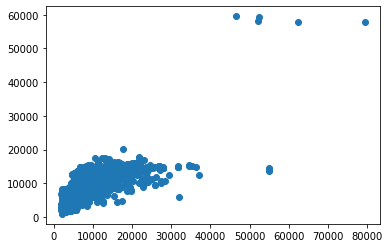

In [241]:
plt.scatter(y,y_hat)
plt.show()

In [242]:
from sklearn.metrics import r2_score
r2_score(y,y_hat)

0.6240229428090361

In [243]:
yhat_test=lr.predict(ans2)

In [245]:
y_test=np.array(df2['Price'])

In [246]:
r2_score(y_test,yhat_test)

0.6197176936039914

In [252]:
k=(*[None]*10)

SyntaxError: can't use starred expression here (1777409258.py, line 4)

In [253]:
hh=([None] * 11)

In [254]:
hh

[None, None, None, None, None, None, None, None, None, None, None]

In [2]:
import pickle

In [3]:
pickled_model = pickle.load(open(r'C:\Users\mritu\PycharmProjects\Projects\flight_fare_prediction\housing\artifact\model_trainer\2022-09-03-17-14-58\trained_model\model.pkl', 'rb'))
# pickled_model.predict(X_test)

In [5]:
athletes_df_file = open(r"C:\Users\mritu\PycharmProjects\Projects\flight_fare_prediction\housing\artifact\model_trainer\2022-09-03-17-14-58\trained_model\model.pkl", "rb")
athletes = pickle.load(athletes_df_file)
print(athletes)

LinearRegression()
